# Learning Outcomes

- What is unitary transformation and why do we require our quantum gates to be unitary?
- Given the action of a quantum gate on $\langle 0 |$ and $| 1 \rangle$, how to construct its matrix ?
- How to design and run quantum circuits using Qiskit? 
- How to read Qiskit documentation? 
- Exercises for using the gates learned in the class. Namely, X,Y,Z,H,Rz,Swap,CNOT,Toffoli,Fredkin.



# Single Qubit Quantum Gates

We have Pauli gates $I,X,Y$ and $Z$ whose action on the basis states are as follows:

$$I | 0 \rangle = | 0 \rangle,\quad I | 1 \rangle = | 1 \rangle$$ 

$$X | 0 \rangle = | 1 \rangle,\quad X | 1 \rangle = | 0 \rangle$$ 

$$Y | 0 \rangle = i| 1 \rangle,\quad Y | 1 \rangle = -i| 0 \rangle$$ 

$$Z | 0 \rangle = | 0 \rangle,\quad Z | 1 \rangle = -| 1 \rangle$$ 


# Exercise 1

If we define $| 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $| 1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$, how do we represent $X,Y,Z$ and $I$ in this basis ? 

# Answer
 
$$ I = \begin{bmatrix} ? & ?\\ ? & ? \end{bmatrix} $$

$$ X = \begin{bmatrix} ? & ?\\ ? & ? \end{bmatrix} $$

$$ Y = \begin{bmatrix} ? & ?\\ ? & ? \end{bmatrix} $$

$$ Z = \begin{bmatrix} ? & ?\\ ? & ? \end{bmatrix} $$

We also have fancier single qubit gates, such as $H$ and $R_\phi$ whose action on basis kets are defined as:

$$H | 0 \rangle = \frac{1}{\sqrt{2}}| 0 \rangle + \frac{1}{\sqrt{2}}| 1 \rangle ,\quad H | 1 \rangle =  \frac{1}{\sqrt{2}}| 0 \rangle - \frac{1}{\sqrt{2}}| 1 \rangle$$ 

$$R_\phi | 0 \rangle = | 0 \rangle, \quad R_\phi | 1 \rangle = e^{i\phi} | 1 \rangle $$


# Exercise 2

If we define $| 0 \rangle$ and $| 1 \rangle$ as in the previous exercise, how do we represent $H$ and $R_\phi$ gates in matrix form?

# Answer

$$ H = \begin{bmatrix} H_{11} & H_{12}\\ H_{21} & H_{22} \end{bmatrix} $$

$$ R_\phi = \begin{bmatrix} R_{11} & R_{12}\\ R_{21} & R_{22} \end{bmatrix} $$

# Exercise 3

Can we treat any 2 by 2 matrix as a quantum gate? If not, what are the restrictions for an operator to be a valid quantum gate?

# Answer

??

# Using Qiskit

Now that we know a little bit about quantum gates, it is time for us to learn how to use Qiskit for designing and running quantum circuits.

Every Qiskit program we will be writing will more or less have the following structure:
- Importing the necessary packages
- Initializing quantum/classic registers and/or quantum circuit.
- Designing your quantum circuit.
- Choosing and running it on one of the provided backends.
- Analysing the results.


In [86]:
# So let's start by importing the necessary packages
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer, execute
from qiskit.visualization import plot_histogram


In [2]:
# Initiaizing a quantum circuit
# There is more than one way to initialize a quantum circuit.
# One way is to simply initialize it by giving the number of qubits as an argument
qc1 = QuantumCircuit(5)
# Well, we might also need to save our results to some classical register.
qc2 = QuantumCircuit(5,5)

In [3]:
# Let's see if they are different from each other.
qc1.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4:

In [4]:
qc2.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
c: 5/

In [6]:
# Another way to initialize a quantum circuit is by specifying the quantum and classical registers as follows.
qreg = QuantumRegister(3)
creg = ClassicalRegister(3)
qc3 = QuantumCircuit(qreg,creg)
qc3.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
c0: 3/

As you can see there are many ways to do the same operation. Most of the time the choice is arbitrary and we choose whichever is more convenient. The important lesson here is the fact that Qiskit defined QuantumCircuit,QuantumRegister and many other thing as "objects", and there are methods and attributes of each object which we can use for our purposes.

In [ ]:
# Here I will show the documentation and how to understand what it is talking about.

In [53]:
# Next we design our first quantum circuit.
qc = QuantumCircuit(3,3)
qc.x(0)
qc.x(2)
qc.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
c: 3/═════

In [54]:
# Now we measure our qubits.
#qc.measure_all()
qc.measure([0,1,2],[0,1,2])
qc.draw()

┌─┐      
q_0: ─────┤M├──────
          └╥┘┌─┐   
q_1: ──────╫─┤M├───
     ┌───┐ ║ └╥┘┌─┐
q_2: ┤ X ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c: 3/══════╩══╩══╩═
           0  1  2

In [55]:
# Let's look at the backends provided by qiskit.Aer.
Aer.backends()

[QasmSimulator(
 backend_name='qasm_simulator', provider=AerProvider()),
 StatevectorSimulator(
 backend_name='statevector_simulator', provider=AerProvider()),
 UnitarySimulator(
 backend_name='unitary_simulator', provider=AerProvider()),
 PulseSimulator(
 backend_name='pulse_simulator', provider=AerProvider())]

In [56]:
svsim = Aer.get_backend('statevector_simulator')
qasmsim = Aer.get_backend('qasm_simulator')
unisim = Aer.get_backend('unitary_simulator')

In [57]:
# This turns our circuit into some kind of assembly code for quantum computers.
qobj = assemble(qc)

In [58]:
result_qasm = qasmsim.run(qobj,shots=1000).result()
result_sv = svsim.run(qobj).result()
result_uni = unisim.run(qobj).result()

In [59]:
result_sv

Result(backend_name='statevector_simulator', backend_version='0.7.1', qobj_id='24a54026-fe90-4b6f-abb0-0f7a91936339', job_id='3763c8c6-698a-4b61-83f9-c219697719e3', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x4': 1}, statevector=[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, n_qubits=3, name='circuit19', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=2378394817, time_taken=0.000145393, metadata={'parallel_shots': 1, 'parallel_state_update': 4})], date=2021-04-02T23:22:05.218620, status=COMPLETED, metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000278402}, time_taken=0.0007009506225585938)

In [60]:
# That's all good but we can't really use these Result objects directly. Let's see what kind of methods they have.
result_qasm.

{'100': 1000}

# Important Remarks about Backends

- Qasm simulator simulates the quantum computer, but we can't access the full state vector. 
- In order to get the full state vector, we should use statevector_simulator backend, which is slower than qasm_simulator.
- If we would like to obtain the unitary matrix representing the full operation of the quantum circuit, then we should use unitary_simulator.
- While using the unitary_simulator, be careful not the include any measurements at the end. Otherwise, you will get an error. Why do you think? 

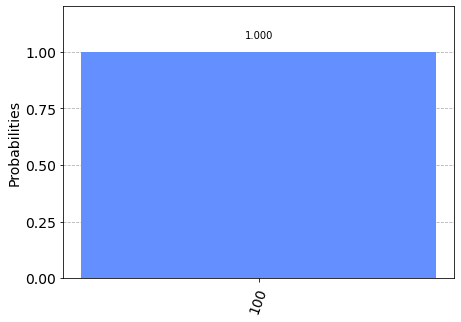

In [61]:
# Allrighty, now we have our Result object coming from our simulators. What can we do with them?
counts = result_qasm.get_counts()
plot_histogram(counts)

In [74]:
# Let's now see the effect of Hadamard gate.
qch = QuantumCircuit(1)
qch.h(0)
qch.measure_all()
counts2 = qasmsim.run(assemble(qch)).result().get_counts()
qch.draw()

┌───┐ ░ ┌─┐
   q_0: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

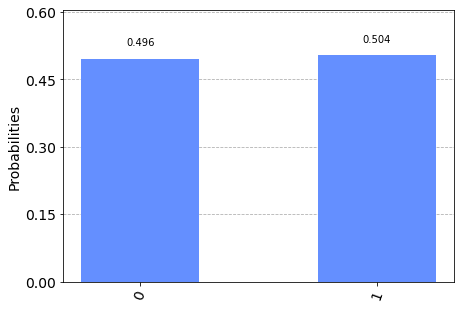

In [75]:
plot_histogram(counts2)

In [77]:
# Let's now see the effect of Hadamard gate with statevector_simulator and unitary simulator
qch = QuantumCircuit(1)
qch.h(0)
sv = svsim.run(assemble(qch)).result().get_statevector()
un = unisim.run(assemble(qch)).result().get_unitary()


In [78]:
sv

array([0.70710678+0.j, 0.70710678+0.j])

In [79]:
un

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])

# Important Remarks about Results
- Qiskit uses little-endian representation. That is when you refer to some qubit, you start counting from the right, "..543210". 
- Although we are simulating a quantum computer, we shouldn't expect to get 50:50 from applying Hadamard gate. 


# Congratulations

Well, that's about all we need to learn about the functionalities provided by Qiskit at this point. Now it's time to do some exercises.

# Exercise 4

Write a function that takes a quantum circuit and a backend as arguments, and runs the circuit on the backend and returns the result object.

In [83]:
def simplerun(qc,back):
    '''
        This function takes in a quantum circuit and a backend and returns a Results object.
    '''
    #return back.run(assemble(qc)).result()

# Exercise 5

Fill in the function below according to the specification.

In [82]:
def num2qc(num):
    '''
    This function takes a decimal number num and returns a quantum circuit which initializes the qubits to the 
        representation of num.
    Args: 
        num: a decimal number.
    Returns:
        QuantumCircuit
    '''
    # Let's first convert num to binary string.
    
    
    
    # We have our binary number in string format, let's initialize our quantum circuit and do the necessary operations.
    # How many qubits do we need ?
    # Which gates should we apply to obtain the necessary circuit?
    

In [7]:
# Now, let's test our function.
number = 21
qc21 = num2qc(number)
qc21.draw()

'0b10111'

# Exercise 6

Design a quantum circuit which initializes the state:

$$ | \Phi^+\rangle = \frac{1}{\sqrt{2}} |00\langle + \frac{1}{\sqrt{2}} |11\rangle$$

In [ ]:
def bell_1():
    '''
    Returns a quantum circuit initializing one of the Bell states.
    '''

# Exercise 7
Design a quantum circuit which initializes the state:

$$ |\Psi^-\rangle = \frac{1}{\sqrt{2}} |01\rangle - \frac{1}{\sqrt{2}} |10\rangle$$

In [ ]:
def bell_2():
    
    

# Exercise 8

Design a quantum circuit which initializes the state:

$$ |W\rangle = \frac{1}{\sqrt{2}} |000\rangle + \frac{1}{\sqrt{2}} |111\rangle$$

In [ ]:
def ghz():
    

# Exercise 9

Now, we will design a classical NOT gate using quantum gates we have learned so far. 

In [87]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw()
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

In [91]:
qc, out = NOT('0')

'1'